<a href="https://colab.research.google.com/github/neerajguleria1/driver-drowsiness-detection/blob/main/Day24Adv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Speed  Seatbelt  Alertness  Heart_rate  Fatigue  Drowsy
0    135         1   0.396539          93        6       0
1    152         1   0.297588          92        3       1
2     76         1   0.853459          86       10       0
3     77         1   0.722192          84        3       0
4    191         0   0.992372          91        0       0
(2000, 6)
Accuracay: 62.67%
Precision: 59.05%
Recall: 47.33%
F1: 52.54%


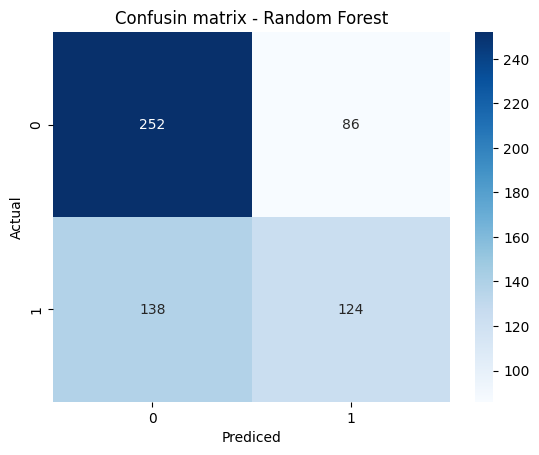

[0.6275 0.62   0.57   0.625  0.5925]
mean score 60.7 %
std dev: 2.23 %


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
n=2000
speed=np.random.normal(120,40,n).clip(30,250)# average speed is 120 and std speed is 40 from n and varies from 30 to 250
seatbelt=np.random.choice([0,1],size=n,p=[0.3,0.7])# seatbelt means 0 is no and 1 is yes 30% is wearing and 70 is not
alertness=np.random.uniform(0.1,1.0,n)# human are not fully inactive or fully active so we take from 0.1 to 1
heart_rate=np.random.normal(80,15,n).clip(50,150)# average heart rate is 80 and variation is 15 which means it go upper and higher and limit lower limit is 50 and upper 150
fatigue=np.random.randint(0,11,n)# fatigue means 0 is full fresh and 10 is extremely tired

drowsy_prob=(
    (1-alertness)*0.5+ # what this means: it defines if alertness define 50% probability
    (fatigue/10)*0.4+ # if driver is tired it defines 40%
    (speed>160)*0.1 # and if speed goes 160 id defines 10% probability
)

# Now we have to convert to 0 or 1
drowsy=np.random.binomial(1,drowsy_prob.clip(0,1)) # this created realastic pattern that ml can learn

df=pd.DataFrame({
    'Speed':speed.astype(int),
    'Seatbelt':seatbelt,
    'Alertness':alertness,
    'Heart_rate':heart_rate.astype(int),
    'Fatigue':fatigue,
    'Drowsy':drowsy
})

print(df.head())
print(df.shape)
df.to_csv("driver drowsiness_dataset.csv",index=False)

# Now we train and test split
X=df[['Speed','Alertness','Seatbelt','Heart_rate','Fatigue']]
y=df['Drowsy']

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3,random_state=42
)

model=RandomForestClassifier(n_estimators=200,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print(f"Accuracay: {acc*100:.2f}%")
print(f"Precision: {prec*100:.2f}%")
print(f"Recall: {rec*100:.2f}%")
print(f"F1: {f1*100:.2f}%")

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')# annot true means we cam see numbers and fmt d means decimal integer
plt.title("Confusion matrix - Random Forest")
plt.xlabel("Prediced")
plt.ylabel("Actual")
plt.show()

kfold=KFold(n_splits=5,shuffle=True,random_state=42)
cv_score=cross_val_score(model,X,y,cv=kfold,scoring='accuracy')

print(cv_score)
print(f"mean score",round(cv_score.mean()*100,2),"%")
print(f"std dev:",round(cv_score.std()*100,2),"%")